# 0) Подготовка, загрузка данных, первичный осмотр и оценка размера файлов (как по числу строк, так и в Мб)

In [1]:
#%reset out

In [2]:
import pandas as pd

In [3]:
ls data

 Том в устройстве C имеет метку System
 Серийный номер тома: 80AD-5924

 Содержимое папки C:\Users\levakin_av\SkillFactory\Homework - Pandas - Stud results\data

11.10.2022  18:34    <DIR>          .
11.10.2022  18:34    <DIR>          ..
03.10.2022  07:58    <DIR>          .ipynb_checkpoints
02.10.2022  22:40             9 703 lectures.csv
02.10.2022  22:40           296 161 questions.csv
03.10.2022  08:09     5 846 760 913 train.csv
11.10.2022  04:21     6 656 128 907 train_2.csv
11.10.2022  18:34    <DIR>          Математика машинного обучения
               4 файлов 12 503 195 684 байт
               4 папок  64 472 494 080 байт свободно


In [4]:
lect_df = pd.read_csv('data\lectures.csv')

In [5]:
lect_df.shape

(418, 4)

In [6]:
lect_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [7]:
quest_df = pd.read_csv('data\questions.csv')

In [8]:
quest_df.shape

(13523, 5)

In [9]:
quest_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [10]:
ls data

 Том в устройстве C имеет метку System
 Серийный номер тома: 80AD-5924

 Содержимое папки C:\Users\levakin_av\SkillFactory\Homework - Pandas - Stud results\data

11.10.2022  18:34    <DIR>          .
11.10.2022  18:34    <DIR>          ..
03.10.2022  07:58    <DIR>          .ipynb_checkpoints
02.10.2022  22:40             9 703 lectures.csv
02.10.2022  22:40           296 161 questions.csv
03.10.2022  08:09     5 846 760 913 train.csv
11.10.2022  04:21     6 656 128 907 train_2.csv
11.10.2022  18:34    <DIR>          Математика машинного обучения
               4 файлов 12 503 195 684 байт
               4 папок  64 472 481 792 байт свободно


In [11]:
big_file = open(r'data\train.csv', 'rb') # r перед строкой пути - обязательно. Без него не работает.
line_count = 0
for line in big_file:
    line_count += 1
print(line_count)
# 101 230 333

101230333


In [12]:
train_df = pd.read_csv(r"data\train.csv")

In [13]:
train_df.shape
# (101230332, 10) - ура, загрузился весь обхем данных
# все данные загрузились в фрейм, но глядя на монитор потребления ресурсов делаю вывод, что фрейм хранится на жетском диске, а не в опер. памяти.


(101230332, 10)

In [14]:
#оценим размер фрейма
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


In [15]:
# интересно, что фрейм занимает более 7.5 Гб, хотя сам файл занимает 5.4 Гб
# Так же заметим, что числовые типы кодированы int64, хотя из постановки задачи мы знаем, что они другие:
    #row_id: (int64)
    #timestamp: (int64)
    #user_id: (int32)
    #content_id: (int16)
    #content_type_id: (int8)
    #task_container_id: (int16)
    #user_answer: (int8)
    #answered_correctly: (int8)
    #prior_question_elapsed_time: (float32)
    #prior_question_had_explanation: (bool)
# Это поможет нам сократить размер датафрейма. Но попробуем исследовать оптимальны ли значения в постановке или можно выбрать еще
# более экономные типы данных для int-колонок

# 1) Сокращение объемов фрейма train.csv ( и не только) за счет изменения типов  данных

## 1.1) Столбец row_id (ID code for the row)

In [16]:
row_id_ser = pd.Series(train_df.row_id)

In [17]:
print(row_id_ser.min(), row_id_ser.max(), row_id_ser.nunique())
# 0 101230331 101230332
# максимальное значение помещается в диапазон int32	 (-2147483648 to 2147483647)\
# ТО ЕСТЬ В ПОСТАНОВКЕ НАС ОБМАНЫВАЮТ. 
# проверим, что изменение типа не приведет к проблемам

0 101230331 101230332


In [18]:
row_id_ser = row_id_ser.astype('int32')
print(row_id_ser.min(), row_id_ser.max(), row_id_ser.nunique())
# 0 101230331 101230332
# ничего не изменилось, но на всякий случай сравним поэлементно.

0 101230331 101230332


In [19]:
(row_id_ser == pd.Series(train_df.row_id)).value_counts()
#True    101230332
#Name: row_id, dtype: int64

True    101230332
Name: row_id, dtype: int64

In [20]:
# итак, моножно заменить тип на Int32
train_df.row_id = train_df.row_id.astype('int32')
train_df.info()
# row_id                          int32
# usage: 7.2+ GB
# Заметим так же что мы могли бы использовать uint32, так как у нас строго положительные значения
# Но uint32 занимает столько же места как и int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int32(1), int64(7), object(1)
memory usage: 7.2+ GB


## 1.2) Числовые столбцы кроме row_id 

In [21]:
## Займемся остальными столбцами с числовыми значениями. Будем исследовать их по той же схеме, но все сразу.
# для этого нам пригодится инфомрация:
#int8	Byte (-128 to 127)
#int16	Integer (-32768 to 32767)
#int32	Integer (-2147483648 to 2147483647)
#int64	Integer (-9223372036854775808 to 9223372036854775807)
#uint8	Unsigned integer (0 to 255)
#uint16	Unsigned integer (0 to 65535)
#uint32	Unsigned integer (0 to 4294967295)

In [22]:
train_df.columns

Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')

In [23]:
# сохраним результаты descibe в служебный фрейм, чтобы в последствии контролировать наши преобразования типов, сравниваия результаты
numcols = ['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time']
control_desc = train_df[numcols].describe()

In [24]:
control_desc

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [25]:
# видим, что сразу можно сделать такие преобразованиея:
# user_answer -> int8
# answered_correctly -> int8
# task_container_id -> int16
# content_type_id -> int8
# content_id -> uint16
# сделаем эти преобразования:
train_df.user_answer = train_df.user_answer.astype('int8')
train_df.answered_correctly = train_df.answered_correctly.astype('int8')
train_df.task_container_id = train_df.task_container_id.astype('int16')
train_df.content_type_id = train_df.content_type_id.astype('int8')
train_df.content_id = train_df.content_id.astype('int16')
train_df.info()
# memory usage: 4.1+ GB - отличный результат!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int16(2), int32(1), int64(2), int8(3), object(1)
memory usage: 4.1+ GB


In [26]:
# сравниваем describe до и после изменения типов
curr_desc = train_df[numcols].describe()
print(control_desc.equals(curr_desc))
# False
# почему-то фреймы не совпали, читаем хелп по equals: Corresponding columns must be of the same dtype.
# получается нам такое сравнение не подходит, так как мы хотим сравнить значения, но не типы (они гарантированно рзаличаются)

False


In [27]:
# сравним фреймы иначе:
print (curr_desc.loc[curr_desc.index != 'std'].to_dict() == control_desc.loc[control_desc.index != 'std'].to_dict())
# True
# почему не совпадает  std - непонятно, но различия минимальны, можно убидетьися вот так:
# for c in numcols:     print (c, curr_desc[c] - control_desc[c])


True


In [28]:
# отдельно разберемся с user_id                         
print(train_df.user_id.min(), train_df.user_id.max(), train_df.user_id.nunique())
# 115      2 147 482 888     393656    
# максимальное значение int32 = 2 147 483 647
# вывод - user_id помещается в int32

115 2147482888 393656


In [29]:
train_df.user_id = train_df.user_id.astype('int32')

In [30]:
# отдельно разберемся с prior_question_had_explanation
# поймем, что за тип там хранится:
type(train_df.prior_question_had_explanation.iloc[1024342]) # случайная строка
#bool
# не меняем это поле
# так же не будем менять типы у timestamp и prior_question_elapsed_time     

bool

In [31]:
# финальный размер фрейма:
train_df.info()
# memory usage: 3.7+ GB - в два раза меньше, чем раньше.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int16(2), int32(2), int64(1), int8(3), object(1)
memory usage: 3.7+ GB


## 1.3) Сокращение объема lectures

In [32]:
lect_df = pd.read_csv('data\lectures.csv')

In [33]:
lect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [34]:
lect_df.head(3)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept


In [35]:
print(lect_df.part.min(), lect_df.part.max())
print(lect_df.lecture_id.min(), lect_df.lecture_id.max())
print(lect_df.tag.min(), lect_df.tag.max())
print((lect_df.type_of.unique()))

1 7
89 32736
0 187
['concept' 'solving question' 'intention' 'starter']


In [36]:
lect_df.part = lect_df.part.astype('int8')
lect_df.tag = lect_df.tag.astype('uint8')
lect_df.lecture_id = lect_df.lecture_id.astype('int16')

In [37]:
lect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    uint8 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(1), int8(1), object(1), uint8(1)
memory usage: 5.0+ KB


In [38]:
lect_df.head(3)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept


In [39]:
lect_df.type_of = lect_df.type_of.astype('category')
lect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int16   
 1   tag         418 non-null    uint8   
 2   part        418 non-null    int8    
 3   type_of     418 non-null    category
dtypes: category(1), int16(1), int8(1), uint8(1)
memory usage: 2.4 KB


In [40]:
lect_df.type_of.cat.codes

0      0
1      0
2      0
3      2
4      2
      ..
413    2
414    2
415    0
416    0
417    0
Length: 418, dtype: int8

In [41]:
lect_df.type_of.cat.categories

Index(['concept', 'intention', 'solving question', 'starter'], dtype='object')

## 1.3) Сокращение объема questions

In [42]:
display(quest_df.head())

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [43]:
display(quest_df.describe())

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [44]:
quest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [45]:
quest_df.question_id = quest_df.question_id.astype('int16')
quest_df.bundle_id = quest_df.bundle_id.astype('int16')
quest_df.correct_answer = quest_df.correct_answer.astype('int8')
quest_df.part = quest_df.part.astype('int8')
quest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


In [46]:
len(quest_df.tags.value_counts())
#1519
# не будем переводить в категорию

1519

In [47]:
s = set()
x = []
for row in quest_df.itertuples():
    x = x + str(row.tags).split(sep = ' ')
print(len(set(x)))
# всего 189 уникальных тэгов. Не будем разворачивать их в колонки, слишком много уникальных значений.

189


# 2) Поиск и очистка данных от аномальных значений

In [48]:
# теперь когда датафрейм стал меньше, посмотрим на данные более внимательно

In [49]:
train_df.count()
# видим, что в prior_question_elapsed_time есть nan, что соответствует постановке

row_id                            101230332
timestamp                         101230332
user_id                           101230332
content_id                        101230332
content_type_id                   101230332
task_container_id                 101230332
user_answer                       101230332
answered_correctly                101230332
prior_question_elapsed_time        98878794
prior_question_had_explanation    100837826
dtype: int64

## 2.1) Исследование prior_question_elapsed_time (pqe_time)

In [50]:
etime_stat_ser = train_df.prior_question_elapsed_time.value_counts().sort_values(ascending = False)

In [51]:
etime_stat_ser

17000.0     5154588
16000.0     4752104
18000.0     4670915
19000.0     4017031
15000.0     3640279
             ...   
259666.0          1
298600.0          1
299666.0          1
297200.0          1
256400.0          1
Name: prior_question_elapsed_time, Length: 3258, dtype: int64

In [52]:
# посмотрим, как распределены проценты по самы частым временам
etime_stat_ser1 = etime_stat_ser.apply(lambda x: round(100*x/98878794, 3))
etime_stat_ser1.head(20)
# обратим внимание, что самые часты времена приходятся на целое число секунды (кратны 1000), это не соотвествует ожиданиям 

17000.0    5.213
16000.0    4.806
18000.0    4.724
19000.0    4.063
15000.0    3.682
20000.0    3.638
21000.0    3.364
22000.0    3.076
23000.0    2.708
14000.0    2.664
24000.0    2.351
13000.0    2.085
25000.0    2.045
12000.0    1.845
26000.0    1.793
11000.0    1.680
10000.0    1.595
27000.0    1.587
9000.0     1.525
28000.0    1.410
Name: prior_question_elapsed_time, dtype: float64

In [53]:
import matplotlib.pyplot as plt

<AxesSubplot:>

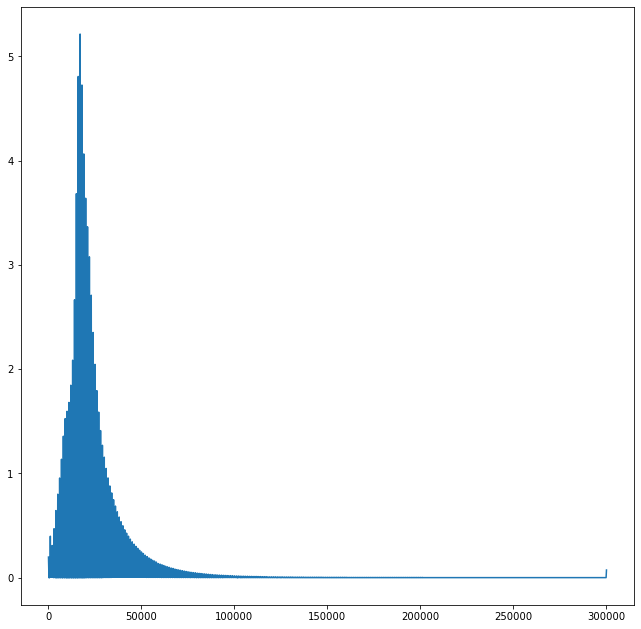

In [54]:
etime_stat_ser1.sort_index().plot(figsize = (11,11))

<AxesSubplot:>

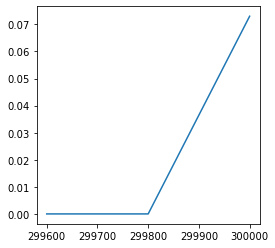

In [55]:
# видим небольшой всплеск на больших значениях абсциссы, исследуем их
etime_stat_ser1.sort_index().tail(5).plot(figsize = (4,4))

In [56]:
etime_stat_ser.sort_index().tail(5)

299600.0        3
299666.0        1
299750.0       13
299800.0       13
300000.0    71896
Name: prior_question_elapsed_time, dtype: int64

In [57]:
# видим, что 72 тыс. строк имеет значение 300 секунд. Видимо, это максимальное значение в системе.
# удалять или как-то менять эти данные было бы неправильно, но будем помнить об этой особенности, 
# на случай если мы решим ввести категорию по prior_question_elapsed_time

<AxesSubplot:>

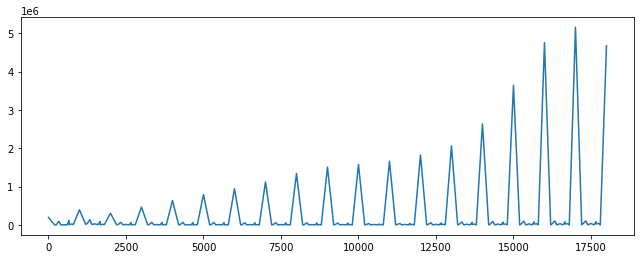

In [58]:
# более детально исследуется тот факт, что на целое число секун приходятся пики:
etime_stat_ser.sort_index().head(200).plot(figsize = (11,4))

<AxesSubplot:>

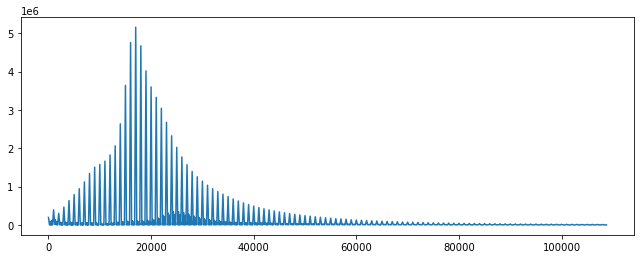

In [59]:
# обратим внимание, что распределения для целых и нецелых - разные. На графике ниже видно, что ни максимумы ни форма двух (?) мод не совпадают.
#Это еще одна странность.
etime_stat_ser.sort_index().head(1200).plot(figsize = (11,4))

<AxesSubplot:>

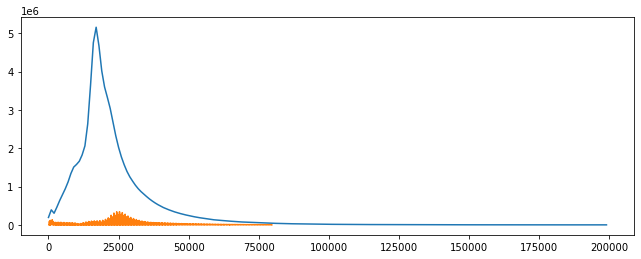

In [60]:
# покажем это более наглядно
whole_sec_ind_list = list(range(0,301000,1000))
#print(whole_sec_ind_list)
z = etime_stat_ser[[i in whole_sec_ind_list for i in etime_stat_ser.index]]
z.sort_index().head(200).plot(figsize = (11,4))
w = etime_stat_ser[[i not in whole_sec_ind_list for i in etime_stat_ser.index]]
w.sort_index().head(800).plot(figsize = (11,4))

<AxesSubplot:>

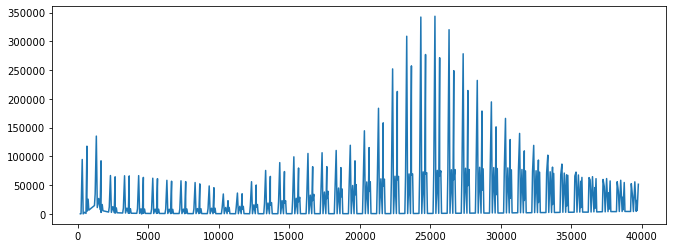

In [61]:
w = etime_stat_ser[[i not in whole_sec_ind_list for i in etime_stat_ser.index]]
w.sort_index().head(400).plot(figsize = (11,4))
# этот шум выглядит как несколько смешанных рядов
# таких строк очень много, миллионы строк.

In [62]:
# пока непонятно, что с ними делать. Нет повода утверждать, что это точно ошибки,
# оставим эти строки в датафрейме, не будем их удалять.

In [63]:
# переименуем пару колонок
train_df.rename(inplace=True, columns={'prior_question_elapsed_time': 'pqe_time'})
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pqe_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [64]:
train_df.rename(inplace=True, columns={'prior_question_had_explanation': 'pq_had_expl'})
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pqe_time,pq_had_expl
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


## 2.2) Избавимся от nan  в PQE_time

In [65]:
import math as m
train_df['pqe_nan'] = train_df.pqe_time.apply(lambda x: m.isnan(x))

In [66]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pqe_time,pq_had_expl,pqe_nan
0,0,0,115,5692,0,1,3,1,NaN,NaN,True
1,1,56943,115,5716,0,2,2,1,37000.0,False,False
2,2,118363,115,128,0,0,0,1,55000.0,False,False
3,3,131167,115,7860,0,3,0,1,19000.0,False,False
4,4,137965,115,7922,0,4,1,1,11000.0,False,False


In [67]:
train_df['pqe_time_2'] = train_df['pqe_time'].apply(lambda x: -1 if m.isnan(x) == True else int(x))

In [68]:
train_df.drop(labels = 'pqe_time', axis=1,inplace = True )

In [69]:
train_df.rename(columns={'pqe_time_2':'pqe_time'}, inplace=True)
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_nan,pqe_time
0,0,0,115,5692,0,1,3,1,NaN,True,-1
1,1,56943,115,5716,0,2,2,1,False,False,37000
2,2,118363,115,128,0,0,0,1,False,False,55000
3,3,131167,115,7860,0,3,0,1,False,False,19000
4,4,137965,115,7922,0,4,1,1,False,False,11000


In [70]:
train_df.drop(labels = 'pqe_nan', axis=1,inplace = True )

In [71]:
train_df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time
0,0,0,115,5692,0,1,3,1,NaN,-1
1,1,56943,115,5716,0,2,2,1,False,37000
2,2,118363,115,128,0,0,0,1,False,55000
3,3,131167,115,7860,0,3,0,1,False,19000
4,4,137965,115,7922,0,4,1,1,False,11000


## 2.3) Попарная консистентность полей: train_df.content_id и quest_df.question_id

In [72]:
# content_id - это ключ для question_id в файле questions (для строк content_type_id = 0)
# проверим, что в train нет значений content_id, которых нет в questions

list1 = train_df[train_df.content_type_id == 0]['content_id'].unique()
set1 = set(list1)
list2 = quest_df['question_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 13523 13523 13523 13523 0 0 0
# все сходится: в train нет id вопросов, которых не было бы в соотвествующем справочнике вопросов

13523 13523 13523 13523 0 0 0


In [73]:
# Для того, чтобы заново не прогонять все исследования, запишем текущий вид train_df в файл
train_df.to_csv('data/train_2.csv')

In [74]:
'''
 0   row_id                          int32  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 '''

'\n 0   row_id                          int32  \n 1   timestamp                       int64  \n 2   user_id                         int32  \n 3   content_id                      int16  \n 4   content_type_id                 int8   \n 5   task_container_id               int16  \n 6   user_answer                     int8   \n 7   answered_correctly              int8   \n 8   prior_question_elapsed_time     float64\n 9   prior_question_had_explanation  object \n '

In [75]:
tst_train_df = pd.read_csv('data/train_2.csv', nrows = 100)
tst_train_df.head(10)


,Unnamed: 0,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time
0,0,0,0,115,5692,0,1,3,1,NaN,-1
1,1,1,56943,115,5716,0,2,2,1,False,37000
2,2,2,118363,115,128,0,0,0,1,False,55000
3,3,3,131167,115,7860,0,3,0,1,False,19000
4,4,4,137965,115,7922,0,4,1,1,False,11000
5,5,5,157063,115,156,0,5,2,1,False,5000
6,6,6,176092,115,51,0,6,0,1,False,17000
7,7,7,194190,115,50,0,7,3,1,False,17000
8,8,8,212463,115,7896,0,8,2,1,False,16000
9,9,9,230983,115,7863,0,9,0,1,False,16000


In [76]:
del tst_train_df
import gc
gc.collect()

21

## 2.4) Попарная консистентность полей: train_df.content_id и lect_df.lecture_id

In [77]:
# выполним похожую проверку для лекций
# проверим, что в train нет значений content_id, которых нет в questions

#фильтруем оп content_type_id == 1, нам нужны только лекции
set1 = set()
set2 = set()
list1 = train_df[train_df.content_type_id == 1]['content_id'].unique()
set1 = set(list1)
list2 = lect_df['lecture_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 415 418 415 415 3 0 3
# все в порядке: в train нет лекци, отсутствющих в справочнике

415 418 415 415 3 0 3


## 2.5) Попарная консистентность полей: train_df.task_container_id и lect_df.bundle_id

In [78]:
set1 = set()
set2 = set()
list1 = train_df[train_df.content_type_id == 0]['task_container_id'].unique()
set1 = set(list1)
list2 = quest_df['bundle_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 10000 9765 7476 7476 4813 2524 2289
# Данне не консистентны
# Этот результат говорит о том, что в train.task_container_id  встречаются значения, которых нет в QUESTIONS.bundle_id
# таких значений 4813, посмотрим на строки с такими train.task_container_id:

10000 9765 7476 7476 4813 2524 2289


In [79]:
#q_train_df = train_df[train_df.content_type_id == 0]

#cont_id = pd.merge(left = train_df[train_df.content_type_id == 0], 
#                   right = quest_df, 
#                   how = 'left', 
#                   left_on = ['content_id','task_container_id'], 
#                   right_on = ['question_id','bundle_id'],
#                   suffixes=('_left', '_right'),
#                   indicator=True)
#display(cont_id.head(20))     


# MemoryError  - печаль, но не повод сдаваться

In [80]:
#quest_df.filter?

In [81]:
#list2 = train_df[train_df.content_type_id == 0][['content_id','task_container_id']]
#list2['cnt_content_id'] = list2['content_id'].apply(lambda x: 1)
#list3 = pd.Series(list2)
#list3 = list2[['task_container_id','content_id', 'cnt_content_id']].groupby(by = ['task_container_id','content_id']).sum()
#list3.sort_values(by = ['cnt_content_id'])
#display(list2)


# все равно MemoryError

In [82]:


#x = tuple()
#y = set()
#for i, r in train_df.iterrows():
#    if row['content_type_id'] == 0:
#        x = (row['content_id'], row['task_container_id'])
#        y.add(x)
#    i += 1
#    if i % 10 == 0: 
#         print(i)
    
#for i in range(0, 101230333):
#    if train_df.loc[i].content_type_id == 0:
#        x = (train_df.loc[i].content_id, train_df.loc[i].task_container_id)
#        y.add(x)
#    i += 1
#    if i % 10000 == 0:
#        print(i)
#print(len(y))

# все равно MemoryError  

In [83]:
#pd.read_csv?

In [84]:
#%reset Out

In [85]:
#import gc
#del train_df
#gc.collect()
big_file = open('data/train_2.csv', 'rb')
line_count = 0
for line in big_file:
    line_count += 1
print(line_count)
# 101 230 333



101230333


In [86]:
#%reset Out

In [87]:
train_df = pd.read_csv('data/train_2.csv',
                       dtype= {'row_id':'int32','timestamp':'int64','user_id':'int32','content_id':'int16','content_type_id':'int8','task_container_id':'int16','user_answer':'int8','answered_correctly':'int8','prior_question_elapsed_time':'float64','pq_had_expl':'object','pqe_time':'float64' }, 
                       usecols = ['row_id','timestamp','user_id','content_id','content_type_id','task_container_id','user_answer','answered_correctly','pq_had_expl','pqe_time'],
                       )

In [88]:
row_cnt  = train_df[train_df.content_type_id == 0].shape[0]
row_cnt
#99 271 300

99271300

In [89]:
train_df.head(10)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time
0,0,0,115,5692,0,1,3,1,NaN,-1.0
1,1,56943,115,5716,0,2,2,1,False,37000.0
2,2,118363,115,128,0,0,0,1,False,55000.0
3,3,131167,115,7860,0,3,0,1,False,19000.0
4,4,137965,115,7922,0,4,1,1,False,11000.0
5,5,157063,115,156,0,5,2,1,False,5000.0
6,6,176092,115,51,0,6,0,1,False,17000.0
7,7,194190,115,50,0,7,3,1,False,17000.0
8,8,212463,115,7896,0,8,2,1,False,16000.0
9,9,230983,115,7863,0,9,0,1,False,16000.0


## 2.6) Попарная консистентность полей: train_df.task_container_id ДЛЯ ЛЕКЦИЙ и quest_df.bundle_id

In [90]:

set1 = set()
set2 = set()
list1 = train_df[train_df.content_type_id == 1]['task_container_id'].unique()
set1 = set(list1)
list2 = quest_df['bundle_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 9369 9765 6943 6943 5248 2426 2822
# данные не консистентны. Все еще не ясно, что такое task_container_id для лекций.

9369 9765 6943 6943 5248 2426 2822


## 2.7) Попарная консистентность полей: train_df.task_container_id ДЛЯ ЛЕКЦИЙ и train_df.task_container_id ДЛЯ ВОПРОСОВ

In [91]:
set1 = set()
set2 = set()
list1 = train_df[train_df.content_type_id == 1]['task_container_id'].unique()
set1 = set(list1)
list2 = train_df[train_df.content_type_id == 0]['task_container_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 9369 10000 9369 9369 631 0 631
# таким образом все бандлы лекций есть и у вопросов. Обратное не верно.
# Делаем вывод, что лекции поставляются в одном бандле с вопросами, то есть 
# у них нет своей группировки в бандлы и они наследую бандл от той группы вопросов, в рамках которой они были показаны студенту

9369 10000 9369 9369 631 0 631


## 2.8) Вывод из 2.5 - 2.8

In [92]:
# мы нашли такие task_container_id, каких нет в questions, но пока не ясно, что это значит. Удалять эти строки пока не будем.
# Дальнейшие попытки исследовать этот момент заканчиваются MemoryError, 
# поэтому просто запишем в фрейм еще один столбец-индикатор того, есть ли соотвествующий task_container_id среди bundle_id:

In [93]:

set1 = set()
set2 = set()
list1 = train_df[train_df.content_type_id == 0]['task_container_id'].unique()
set1 = set(list1)
list2 = quest_df['bundle_id'].unique()
set2 = set(list2)
dset = set1 - set2

train_df['cont_is_bundle_ind'] = train_df['task_container_id'].apply(lambda x: 0 if x in dset else 1)    


In [94]:
display(train_df[train_df['cont_is_bundle_ind'] == 1].head(5))
display(train_df[train_df['cont_is_bundle_ind'] == 0].head(5))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind
0,0,0,115,5692,0,1,3,1,NaN,-1.0,1
1,1,56943,115,5716,0,2,2,1,False,37000.0,1
2,2,118363,115,128,0,0,0,1,False,55000.0,1
3,3,131167,115,7860,0,3,0,1,False,19000.0,1
4,4,137965,115,7922,0,4,1,1,False,11000.0,1


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind
3552,3552,5253595800,24418,218,0,1401,3,1,True,18000.0,0
3553,3553,5253620336,24418,505,0,1402,0,1,True,16000.0,0
3556,3556,5253693471,24418,779,0,1404,0,1,True,18000.0,0
3557,3557,5253717572,24418,828,0,1405,3,1,True,17000.0,0
3559,3559,5253801393,24418,986,0,1407,3,0,True,17000.0,0


## 3.1) Корректность полей: корректность поля answered_correctly

In [95]:
# в quet есть индикатор корректного ответа и сам ответ. Проверим по quest_df.correct_answer, верно ли заполнен индикатор.

In [96]:
# сведем задачу к консистентности полей, но будем сравнивать не поле с полем, а пару полей с парой полей

### 3.1.1) Корректность строк с answered_correctly =  1`

In [97]:
# напомним, что все id вопросов, которые есть в train, есть и в quest, мы проверили это на этапе проверок консистентности

In [98]:
corr_quest_df =quest_df[['question_id','correct_answer']]
corr_quest_df.shape

(13523, 2)

In [99]:
corr_train_df = train_df[(train_df.answered_correctly == 1) 
                         & (train_df.content_type_id == 0)].groupby(['content_id','user_answer']).size().reset_index(level=[0,1])
display(corr_train_df.head(20))

,content_id,user_answer,0
0,0,0,6266
1,1,1,6589
2,2,0,24890
3,3,0,17906
4,4,3,19461
5,5,2,8383
6,6,2,26910
7,7,0,14363
8,8,3,7738
9,9,3,14389


In [100]:
corr_train_df.shape

(13519, 3)

In [101]:
comp_df = pd.merge(left=corr_quest_df, 
                   right=corr_train_df, 
                   how='outer',
                   left_on = 'question_id', 
                   right_on='content_id', 
                   validate = '1:m',
                   suffixes = ('_quest','_train'))
comp_df.shape

(13523, 5)

In [102]:
comp_df[(comp_df.user_answer != comp_df.correct_answer)]
# все строки должны быть с NaN в content_id
# так и есть, значит все правильно

,question_id,correct_answer,content_id,user_answer,0
1484,1484,2,NaN,NaN,NaN
1485,1485,0,NaN,NaN,NaN
1486,1486,3,NaN,NaN,NaN
10007,10007,0,NaN,NaN,NaN


### 3.1.1) Корректность строк с answered_correctly =  0`

In [103]:
corr_train_df = train_df[(train_df.answered_correctly == 0) 
                         & (train_df.content_type_id == 0)].groupby(['content_id','user_answer']).size().reset_index(level=[0,1])
display(corr_train_df.head())
comp_df = pd.merge(left=corr_quest_df, 
                   right=corr_train_df, 
                   how='outer',
                   left_on = 'question_id', 
                   right_on='content_id', 
                   validate = '1:m',
                   suffixes = ('_quest','_train'))
print(comp_df.shape)
display(comp_df[(comp_df.user_answer == comp_df.correct_answer)])
# убедились, что нет строк, в которых ответ совпадат с правильным ответом и при это они помечены answered_correctly = 0

,content_id,user_answer,0
0,0,1,342
1,0,2,209
2,0,3,86
3,1,0,561
4,1,2,74


(38570, 5)


,question_id,correct_answer,content_id,user_answer,0


## 3.2 Проверка корректности заполнения полей user_answer, answered_correctly _для лекций_

In [104]:
# теперь проверим следующие утверждения из постановки:
# user_answer: ... Read -1 as null, for lectures.
# answered_correctly: ... if the user responded correctly. Read -1 as null, for lectures.
# сделаем это сразу несоклькими эквивалентными методами, чтобы потренироваться.

In [105]:
display(train_df[(train_df.content_type_id == 1) & ((train_df.user_answer != -1) |  (train_df.answered_correctly != -1))])
display(train_df.query('content_type_id == 1 and (user_answer != -1 or  answered_correctly != -1)'))
display(train_df.loc[(train_df.content_type_id == 1) & ((train_df.user_answer != -1) |  (train_df.answered_correctly != -1))])

#мы убедились, что лекции не содержат в этих полях ничего кроме -1
# но можеть быть есть не-лекции (вопросы), которые содержат -1 в этих полях? Этого тоже не дожно быть, проверим:

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


In [106]:
display(train_df[(train_df.content_type_id == 0) & ((train_df.user_answer == -1) |  (train_df.answered_correctly == -1))])
display(train_df.query('content_type_id == 0 and (user_answer == -1 or  answered_correctly == -1)'))
display(train_df.loc[(train_df.content_type_id == 0) & ((train_df.user_answer == -1) |  (train_df.answered_correctly == -1))])
# все хорошо, результат - пустое множество

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind


## 3.3 Проверка корректности LECTURES.tag

In [107]:
# в условии сказано, что одни tag для каждой лекции, проверим визуально:

In [108]:
lect_df.tag.unique()

array([159,  70,  45,  79, 156, 114, 179, 134,  93,  80,  98, 101,  33,
        74,  60, 181,  43,   4, 109,  89, 142, 140, 104,   1,  65, 155,
        26, 178, 173,   7, 147, 171,  78,  62,  64, 141, 124, 161,  24,
        23, 152,   8,  94, 119,  37, 177,  54, 157, 132,   6,  67, 123,
        50,  25, 175, 116, 136,  20, 129, 127,  53, 130,  13,  42,  72,
        36, 172,  57, 151,   9, 187,  58, 166,  49, 164, 163,  47, 139,
        85,  91, 158,  48,  69,  76,  28, 167,  18,   0,  27,  19, 149,
        99,  39,  34,  61,  14, 113, 182,  55, 145,  96, 133,  12, 106,
       126, 105, 125, 168,   5,  71,  82,  44, 108, 143,  90,  16, 112,
        73,  40, 111,  51,  97,  31,  52, 180, 138, 150, 120, 128,  68,
        95, 170, 184,  30, 174, 153,  66,  17,  75,  83, 183, 148, 144,
       103, 118,  15, 115, 176, 137, 169,   2], dtype=uint8)

# 4) Обогащение данных train данными из lectures и questions

In [109]:
# так как файл train очень большой, а при исследовании могуть потребоваться отсутствующие в train данные из lect и quest
# постоянно делать merge не удобно, а удобно один раз сделать это и работать уже с обогащенным фреймом


In [110]:
# так как мой комп не тянет объединения train c чем либо еще, 
# а делать это в цикле и потом объединять сабс-фреймы не кажется интеллектуальной задачей,
# я продемонстрирую свои навыки на укороченном фрейме train # в которм 1 000 000 записей

# так же я не буду писать единый merge трех фреймов, а сделаю это поочереди

## 4.0) Укороченный фрейм

In [111]:
sample_train_df = train_df.head(2000000).tail(1000000)

In [112]:
sample_train_df.shape

(1000000, 11)

## 4.1) Обогатим train полями из lectures

In [113]:
# проверим, что множество lecture_id НЕ ПЕРЕСЕКАЕТСЯ с множеством question_id:
set1 = set()
set2 = set()
list1 = lect_df['lecture_id'].unique()
set1 = set(list1)
list2 = quest_df['question_id'].unique()
set2 = set(list2)
print(len(set1), len(set2), len(set1 & set2), len(set2 & set1), len(set1 ^ set2), len(set1-set2), len(set2-set1))
# 418 9765 122 122 9939 296 9643
#!!! Оказалось, что пересекаются! Надем примеры:

418 13523 158 158 13625 260 13365


In [114]:
set1 & set2

# выберем значение 192

{89,
 100,
 185,
 192,
 317,
 335,
 484,
 641,
 761,
 814,
 1003,
 1077,
 1105,
 1144,
 1253,
 1308,
 1450,
 1501,
 1604,
 1731,
 1887,
 1907,
 1967,
 2033,
 2049,
 2084,
 2278,
 2282,
 2299,
 2327,
 2476,
 2771,
 2857,
 2904,
 2918,
 3078,
 3113,
 3123,
 3153,
 3255,
 3625,
 3668,
 3697,
 3780,
 3803,
 3852,
 3879,
 3937,
 4057,
 4072,
 4100,
 4118,
 4173,
 4187,
 4385,
 4425,
 4441,
 4652,
 4705,
 4883,
 5120,
 5240,
 5266,
 5588,
 5694,
 5752,
 5990,
 6081,
 6101,
 6137,
 6220,
 6316,
 6481,
 6619,
 6761,
 6797,
 6808,
 6948,
 7008,
 7010,
 7097,
 7385,
 7477,
 7704,
 7785,
 7877,
 7920,
 7926,
 7949,
 8138,
 8207,
 8233,
 8240,
 8288,
 8317,
 8320,
 8330,
 8411,
 8461,
 8513,
 8693,
 8708,
 8821,
 8976,
 8977,
 9174,
 9212,
 9245,
 9477,
 9554,
 9758,
 9831,
 9835,
 9856,
 9896,
 10010,
 10032,
 10040,
 10052,
 10075,
 10180,
 10217,
 10354,
 10382,
 10383,
 10540,
 10688,
 10742,
 10852,
 10928,
 11151,
 11230,
 11236,
 11485,
 11559,
 11772,
 11873,
 11877,
 12007,
 12187,
 12294

In [115]:
display(lect_df[lect_df['lecture_id'] == 192])
display(quest_df[quest_df['question_id'] == 192])

,lecture_id,tag,part,type_of
3,192,79,5,solving question


,question_id,bundle_id,correct_answer,part,tags
192,192,192,1,1,131 104 38


In [116]:
# мы убедились, что, увы нельзя делать объединение train с другими двумя фреймами просто по id.


# придумаем структуру полей обогащенного фрейма:
#    сначала все поля train
#    l_tag: tag лекции, -1 для вопроса
#    l_part: part для лекции, -1 для вопроса
#    type_of_lect: type_of для лекции, nan для вопроса
#    q_part: part для вопроса, -1 для лекции. Не объединяем в одни столбец c l_part, судя по всему разные сущности
#    q_tags: тэг для вопроса, nan для лекции 

lect_df['ind'] = 1

# обхединяемся с lect
ext_sample_train_df = sample_train_df.merge(right=lect_df,
                                            how='left',
                                            validate='m:1',
                                            left_on = ['content_id','content_type_id'],
                                            right_on = ['lecture_id','ind']
                                           )
#extr_train_df    

In [117]:
ext_sample_train_df[ext_sample_train_df.content_type_id == 1].head(2)

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,lecture_id,tag,part,type_of,ind
12,1000012,139567501,20949024,29544,1,47,-1,-1,False,-1.0,1,29544.0,30.0,2.0,concept,1.0
17,1000017,172554699,20949024,32312,1,51,-1,-1,False,-1.0,1,32312.0,176.0,2.0,concept,1.0


In [118]:
ext_sample_train_df.drop(inplace=True, axis=1, labels = ['lecture_id', 'ind'])
ext_sample_train_df.rename(inplace=True, columns = {'tag':'l_tag','part':'l_part','type_of':'type_of_lect'})

In [119]:
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 1].head(2))
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 0].head(2))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect
12,1000012,139567501,20949024,29544,1,47,-1,-1,False,-1.0,1,30.0,2.0,concept
17,1000017,172554699,20949024,32312,1,51,-1,-1,False,-1.0,1,176.0,2.0,concept


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect
0,1000000,26624921,20949024,8207,0,34,1,1,True,9000.0,1,NaN,NaN,NaN
1,1000001,26641933,20949024,5583,0,35,0,0,True,14000.0,1,NaN,NaN,NaN


In [120]:
quest_df['ind'] = 0

# обхединяемся с quest
ext_sample_train_df = ext_sample_train_df.merge(right=quest_df,
                                            how='left',
                                            validate='m:1',
                                            left_on = ['content_id','content_type_id'],
                                            right_on = ['question_id','ind']
                                           )
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 1].head(2))
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 0].head(2))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect,question_id,bundle_id,correct_answer,part,tags,ind
12,1000012,139567501,20949024,29544,1,47,-1,-1,False,-1.0,1,30.0,2.0,concept,NaN,NaN,NaN,NaN,NaN,NaN
17,1000017,172554699,20949024,32312,1,51,-1,-1,False,-1.0,1,176.0,2.0,concept,NaN,NaN,NaN,NaN,NaN,NaN


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect,question_id,bundle_id,correct_answer,part,tags,ind
0,1000000,26624921,20949024,8207,0,34,1,1,True,9000.0,1,NaN,NaN,NaN,8207.0,8207.0,1.0,5.0,8,0.0
1,1000001,26641933,20949024,5583,0,35,0,0,True,14000.0,1,NaN,NaN,NaN,5583.0,5583.0,2.0,5.0,54,0.0


In [121]:
ext_sample_train_df.drop(inplace=True, axis=1, labels = ['question_id','bundle_id','ind','correct_answer'])
ext_sample_train_df.rename(inplace=True, columns = {'tags':'q_tags','part':'q_part'})

In [122]:
# удалим ранее созданные колонки: quest_df['ind'] = 0 lect_df['ind'] = 1
quest_df.drop(inplace=True, axis=1, labels = ['ind'])
lect_df.drop(inplace=True, axis=1, labels = ['ind'])

In [123]:
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 1].head(2))
display(ext_sample_train_df[ext_sample_train_df.content_type_id == 0].head(2))

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect,q_part,q_tags
12,1000012,139567501,20949024,29544,1,47,-1,-1,False,-1.0,1,30.0,2.0,concept,NaN,NaN
17,1000017,172554699,20949024,32312,1,51,-1,-1,False,-1.0,1,176.0,2.0,concept,NaN,NaN


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,pq_had_expl,pqe_time,cont_is_bundle_ind,l_tag,l_part,type_of_lect,q_part,q_tags
0,1000000,26624921,20949024,8207,0,34,1,1,True,9000.0,1,NaN,NaN,NaN,5.0,8
1,1000001,26641933,20949024,5583,0,35,0,0,True,14000.0,1,NaN,NaN,NaN,5.0,54


In [124]:
display(ext_sample_train_df.info())
display(lect_df.info())
display(quest_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   row_id              1000000 non-null  int32   
 1   timestamp           1000000 non-null  int64   
 2   user_id             1000000 non-null  int32   
 3   content_id          1000000 non-null  int16   
 4   content_type_id     1000000 non-null  int8    
 5   task_container_id   1000000 non-null  int16   
 6   user_answer         1000000 non-null  int8    
 7   answered_correctly  1000000 non-null  int8    
 8   pq_had_expl         996123 non-null   object  
 9   pqe_time            1000000 non-null  float64 
 10  cont_is_bundle_ind  1000000 non-null  int64   
 11  l_tag               19076 non-null    float64 
 12  l_part              19076 non-null    float64 
 13  type_of_lect        19076 non-null    category
 14  q_part              980924 non-null   float64 
 15 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lecture_id  418 non-null    int16   
 1   tag         418 non-null    uint8   
 2   part        418 non-null    int8    
 3   type_of     418 non-null    category
dtypes: category(1), int16(1), int8(1), uint8(1)
memory usage: 2.4 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


None

In [125]:
# заменим nan прежде чем преобразовывать столбцы к другим типам:
for col in ['l_part','q_part','l_tag']:
    ext_sample_train_df[col] = ext_sample_train_df[col].apply(lambda x: -1 if m.isnan(x) == True else int(x))

In [126]:

# изменим типы данных столбцов:
ext_sample_train_df[['l_part','q_part']] =  ext_sample_train_df[['l_part','q_part']].astype('int8')
ext_sample_train_df[['l_tag']] = ext_sample_train_df[['l_tag']].astype('int16') # тут мы отказались от uint8 в пользу более широкого типа, так как тепрь в столбце есть -1

In [127]:

display(ext_sample_train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   row_id              1000000 non-null  int32   
 1   timestamp           1000000 non-null  int64   
 2   user_id             1000000 non-null  int32   
 3   content_id          1000000 non-null  int16   
 4   content_type_id     1000000 non-null  int8    
 5   task_container_id   1000000 non-null  int16   
 6   user_answer         1000000 non-null  int8    
 7   answered_correctly  1000000 non-null  int8    
 8   pq_had_expl         996123 non-null   object  
 9   pqe_time            1000000 non-null  float64 
 10  cont_is_bundle_ind  1000000 non-null  int64   
 11  l_tag               1000000 non-null  int16   
 12  l_part              1000000 non-null  int8    
 13  type_of_lect        19076 non-null    category
 14  q_part              1000000 non-null  int8    
 15 

None

In [128]:
# при сокращении объема quest_df мы отказались от категоризации tags, так как уникальных значений много
# но в ext_sample_train_df это имеет смысл, так как строк тоже много, докажем это:
ser1 = ext_sample_train_df['q_tags']
ser2 = ext_sample_train_df['q_tags'].astype('category')
display(ser1.info())
display(ser2.info())
# Выигрыш 5.7 мегабайт на миллион строк, то есть 570 Мб на 100 млн строк. Пол гига не помешают, это 8% от фрейма

<class 'pandas.core.series.Series'>
Int64Index: 1000000 entries, 0 to 999999
Series name: q_tags
Non-Null Count   Dtype 
--------------   ----- 
980924 non-null  object
dtypes: object(1)
memory usage: 15.3+ MB


None

<class 'pandas.core.series.Series'>
Int64Index: 1000000 entries, 0 to 999999
Series name: q_tags
Non-Null Count   Dtype   
--------------   -----   
980924 non-null  category
dtypes: category(1)
memory usage: 9.6 MB


None

In [129]:
ext_sample_train_df['q_tags'] = ext_sample_train_df['q_tags'].astype('category')
display(ext_sample_train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   row_id              1000000 non-null  int32   
 1   timestamp           1000000 non-null  int64   
 2   user_id             1000000 non-null  int32   
 3   content_id          1000000 non-null  int16   
 4   content_type_id     1000000 non-null  int8    
 5   task_container_id   1000000 non-null  int16   
 6   user_answer         1000000 non-null  int8    
 7   answered_correctly  1000000 non-null  int8    
 8   pq_had_expl         996123 non-null   object  
 9   pqe_time            1000000 non-null  float64 
 10  cont_is_bundle_ind  1000000 non-null  int64   
 11  l_tag               1000000 non-null  int16   
 12  l_part              1000000 non-null  int8    
 13  type_of_lect        19076 non-null    category
 14  q_part              1000000 non-null  int8    
 15 

None